# **Heart Failure Prediction Using AutoGluon!**
In this notebook we will see a short demonstration of an automl library i.e AutoGluon for classification task. Please Upvote if you find something usefull.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df=pd.read_csv('../input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isnull().sum()
#There is no null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Exploration


 Now we can plot the distribution of data wrt dependent variable i.e HeartDisease

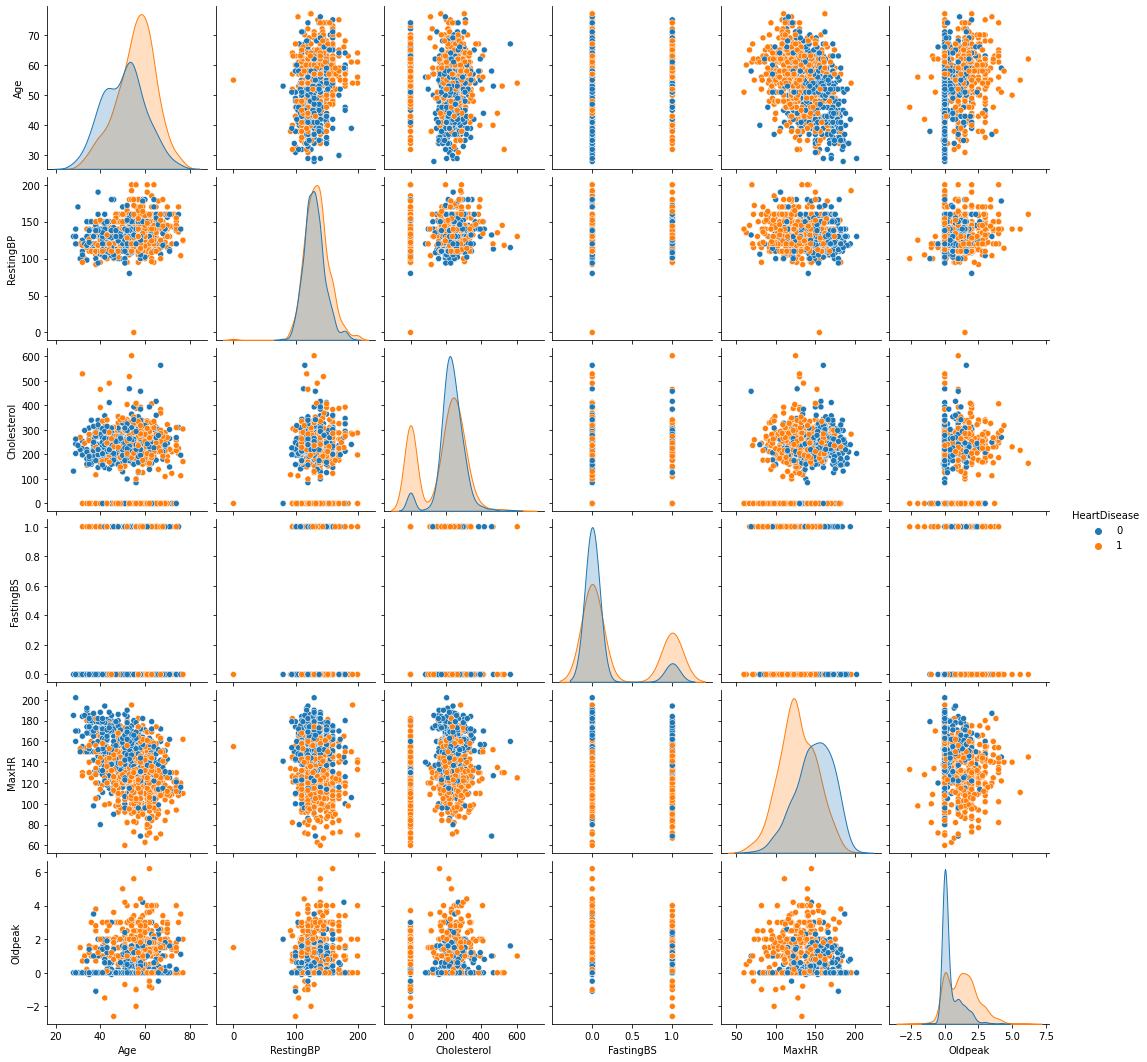

In [7]:
sns.pairplot(df,hue='HeartDisease')


  5. Which are most useful variable in classification? Prove using correlation.

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

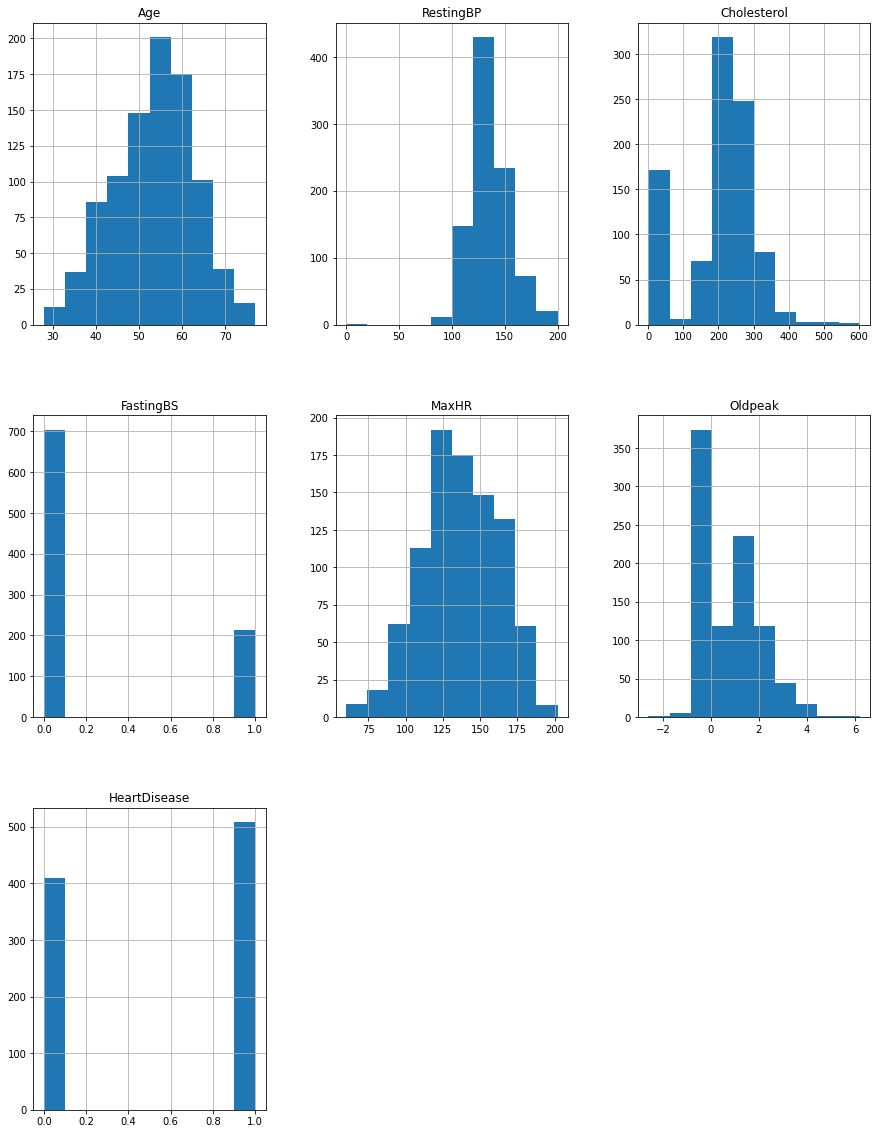

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

Text(0.5, 1.0, 'Heart Diseases')

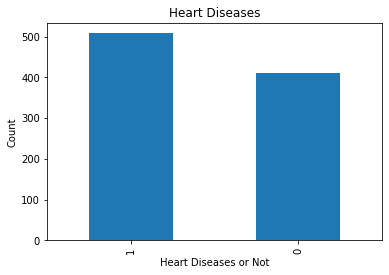

In [10]:
df.HeartDisease.value_counts().plot(kind='bar')
plt.xlabel("Heart Diseases or Not")
plt.ylabel("Count")
plt.title("Heart Diseases")
#Here we can see that dataset is not much imbalanced so there is no need to balance.

# Data Preprocessing

In [11]:
cat = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[cat] = df[cat].apply(lb.fit_transform)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df,test_size=0.2,random_state=0)


In [14]:
X_train.shape

(734, 12)

# Using AutoGluon

In [15]:
!pip install mxnet autogluon

     |████████████████████████████████| 47.3 MB 86 kB/s              
     |████████████████████████████████| 56 kB 3.4 MB/s             
     |████████████████████████████████| 273 kB 57.9 MB/s            
     |████████████████████████████████| 352 kB 59.5 MB/s            
     |████████████████████████████████| 52 kB 1.2 MB/s             
     |████████████████████████████████| 210 kB 62.2 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 27.4 MB 562 kB/s             
     |████████████████████████████████| 4.2 MB 54.8 MB/s            
     |████████████████████████████████| 119 kB 53.6 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 3.0 MB 50.4 MB/s            
     |████████████████████████████████| 166.7 MB 16 kB/s              
     |████████████████████████████████| 67.3 MB 63.7 MB/s            
     |████████████████████████████████| 157 kB 56.1 MB/s            
     |████

In [16]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.tabular.models.knn.knn_rapids_model import KNNRapidsModel
from autogluon.tabular.models.lr.lr_rapids_model import LinearRapidsModel

In [17]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
378,70,1,0,140,0,1,1,157,1,2.0,1,1
356,46,1,0,115,0,0,1,113,1,1.5,1,1
738,65,0,2,160,360,0,0,151,0,0.8,2,0
85,66,1,0,140,139,0,1,94,1,1.0,1,1
427,59,1,0,140,0,0,2,117,1,1.0,1,1


In [18]:
label = 'HeartDisease'

In [19]:
predictor = TabularPredictor(
    label=label
).fit(
    X_train,
    presets='best_quality',
    hyperparameters={
        KNNRapidsModel: {},
        LinearRapidsModel: {},
        'RF': {},
        'XGB': {'ag_args_fit': {'num_gpus': 1}},
        'CAT': {'ag_args_fit': {'num_gpus': 1}},
        'GBM': [{}, {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, 'GBMLarge'],
        'NN': {'ag_args_fit': {'num_gpus': 1}},
        'FASTAI': {'ag_args_fit': {'num_gpus': 1}},
    },
)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

In [20]:
pred_probs = predictor.predict_proba(X_test)
pred_probs.head(5)

,0,1
306,0.097637,0.902363
711,0.247645,0.752355
298,0.054975,0.945025
466,0.093654,0.906346
253,0.737781,0.262219


In [21]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L1,0.895095,0.033020,5.429704,0.033020,5.429704,1,True,1
1,WeightedEnsemble_L2,0.895095,0.035342,5.995849,0.002322,0.566145,2,True,10
2,CatBoost_BAG_L1,0.892371,0.037980,115.620435,0.037980,115.620435,1,True,4
3,NeuralNetFastAI_BAG_L1,0.886921,0.126200,10.139996,0.126200,10.139996,1,True,5
4,XGBoost_BAG_L1,0.885559,0.026139,4.113134,0.026139,4.113134,1,True,6
5,LightGBMLarge_BAG_L1,0.880109,0.025042,4.128477,0.025042,4.128477,1,True,9
6,RandomForest_BAG_L1,0.869210,0.152159,0.759987,0.152159,0.759987,1,True,3
7,LightGBMXT_BAG_L1,0.851499,0.016928,2.101494,0.016928,2.101494,1,True,2
8,LinearRapidsModel_BAG_L1,0.847411,1.423584,2.110127,1.423584,2.110127,1,True,8
9,KNNRapidsModel_BAG_L1,0.698910,1.064956,5.932799,1.064956,5.932799,1,True,7
